# Louvain Method

## 1. Introduction:

### 1.1. Community:

- A community according to the Louvain method is a group of nodes that are more densely connected to each other than to the rest of the network.

### 1.2. Community Detection:

Louvain method is a greedy algorithm for community detection. It is fast and scalable.

- The algorithm is based on the modularity optimization.
- Modularity is a *measure of the quality of a particular division* of a network into communities.
- The modularity is defined as the **fraction of the edges** that fall within the given groups **minus the expected fraction** if edges were **distributed at random**.
- The modularity is maximized by the Louvain method.

### 1.3. Modularity:
- The modularity is defined as:
$$  Q = \frac{1}{2m} \sum_{ij} \left( A_{ij} - \frac{k_i k_j}{2m} \right) \delta(c_i, c_j) $$

- The modularity can be rewritten as:
$$ Q = \frac{1}{2m} \sum_{ij} \left( A_{ij} - \frac{k_i k_j}{2m} \right) \frac{\delta(c_i, c_j) + \delta(c_j, c_i)}{2} $$

### NOTES:

- **Q** is the **modularity** and a **higher value** indicates a **better partition**, where **communities** are more **distinct**.
- **A** is the **adjacency matrix** of the network.
- **k** is the **degree vector** of the network.
- **m** is the **sum of the weights** of all the edges in the network.
- **c** is the **community vector** of the network.
- **$\delta$** is the **Kronecker delta**.
- **i** and **j** are the **node indices**.
- **$c_i$** and **$c_j$** are the **community indices**.
- **$A_{ij}$** is the **weight** of the **edge** between nodes **$i$** and **$j$**.
- **$k_i$** is the **sum of the weights** of the **edges** attached to node **$i$**.
- **$\delta(c_i, c_j)$** is 1 if **$c_i = c_j$** and 0 otherwise.
- The entire **sum is divided by (2m)** to **normalize** the **modularity score**, ensuring that it's **between -1 and 1**.

## 2. Algorithm:
### 2.1. Initialization:
- Each node is assigned to a community.
- The initial community of each node is itself.
- The initial modularity is 0.

### 2.2. Iteration:
- For each node, the algorithm tries to move it to the community of each of its neighbors.
- The modularity is calculated for each move.
- The node is moved to the community that gives the maximum modularity gain.
- The iteration stops when no modularity gain is possible.

## 4. Implementation:
### 4.1. Data Structure:
- The algorithm uses a graph data structure.
- The graph is represented as an adjacency list.
- The graph is stored as a dictionary.
- The keys of the dictionary are the nodes.

### 5. Disadvantage:

- Produces only non-overlapping communities.

## References:
- The algorithm is described in the paper: Fast unfolding of communities in large networks, Vincent D Blondel, Jean-Loup Guillaume, Renaud Lambiotte, Etienne Lefebvre, Journal of Statistical Mechanics: Theory and Experiment 2008(10), P10008 (12pp).
    - The paper is available at:
        - https://arxiv.org/abs/0803.0476
        - https://iopscience.iop.org/article/10.1088/1742-5468/2008/10/P10008/pdf

In [196]:
import networkx as nx
import matplotlib.pyplot as plt
import community
import pandas as pd
import numpy as np
import warnings

pd.set_option('display.max_rows', 100)
warnings.filterwarnings("ignore")

Create the sample graph

In [197]:
G = nx.karate_club_graph()

Print Edges Weight

In [198]:
df = nx.to_pandas_edgelist(G)
df.columns = ['i', 'j', 'weight']
df

,i,j,weight
0,0,1,4
1,0,2,5
2,0,3,3
3,0,4,3
4,0,5,3
5,0,6,3
6,0,7,2
7,0,8,2
8,0,10,2
9,0,11,3


Connections

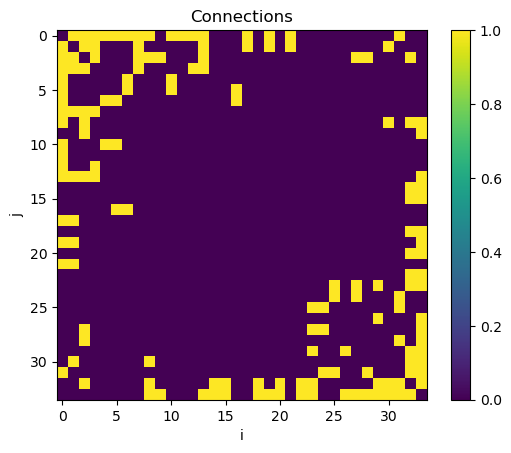

In [199]:
# Get the number of nodes in the graph
n = len(G.nodes)

# Initialize an empty adjacency matrix
adjacency_matrix = np.zeros((n, n))

# Fill the adjacency matrix based on the edges in the graph
for i, j in G.edges():
    adjacency_matrix[i][j] = 1
    adjacency_matrix[j][i] = 1  # If the graph is undirected

plt.imshow(adjacency_matrix)
plt.title("Connections")
plt.xlabel("i")
plt.ylabel("j")
plt.colorbar()
plt.show()

Node 0: Community 0
Node 1: Community 0
Node 2: Community 0
Node 3: Community 0
Node 4: Community 1
Node 5: Community 1
Node 6: Community 1
Node 7: Community 0
Node 8: Community 3
Node 9: Community 3
Node 10: Community 1
Node 11: Community 0
Node 12: Community 0
Node 13: Community 0
Node 14: Community 3
Node 15: Community 3
Node 16: Community 1
Node 17: Community 0
Node 18: Community 3
Node 19: Community 0
Node 20: Community 3
Node 21: Community 0
Node 22: Community 3
Node 23: Community 2
Node 24: Community 2
Node 25: Community 2
Node 26: Community 3
Node 27: Community 2
Node 28: Community 2
Node 29: Community 3
Node 30: Community 3
Node 31: Community 2
Node 32: Community 3
Node 33: Community 3

Communities:
Community 0: [0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21]
Community 1: [4, 5, 6, 10, 16]
Community 3: [8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33]
Community 2: [23, 24, 25, 27, 28, 31]
Modularity: 0.44490358126721763


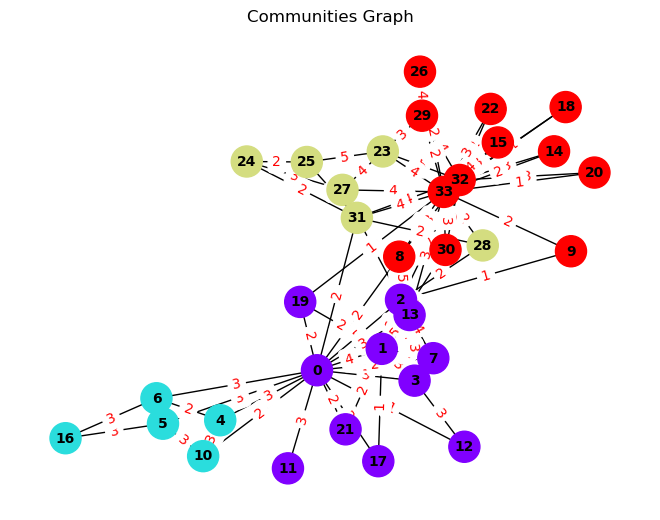

In [200]:
# Finding the communities using the Louvain method
partition = community.best_partition(G)

# Community assignments
for node, community_id in partition.items():
    print(f"Node {node}: Community {community_id}")

# Listing nodes in each community
communities = {}
for node, community_id in partition.items():
    if community_id in communities:
        communities[community_id].append(node)
    else:
        communities[community_id] = [node]

# Printing communities
print("\nCommunities:")
for community_id, nodes in communities.items():
    print(f"Community {community_id}: {nodes}")

# Create a list of colors for nodes based on their community
community_colors = [partition[node] for node in G.nodes()]

# Define a layout for the graph
layout = nx.spring_layout(G)

# Draw the nodes and edges with community colors
nx.draw(G, pos=layout, with_labels=True, node_color=community_colors, cmap=plt.cm.rainbow, node_size=500, font_size=10, font_color='black', font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=edge_labels, font_color='red')

louvain_modularity = community.modularity(partition, G)
print(f'Modularity: {louvain_modularity}')

# Plot the graph
plt.title("Communities Graph")
plt.tight_layout()
plt.show()

### Quantifying collective identity online from self‑defining hashtags
Alexander T. J. Barron & Johan Bollen

- Analyzes over 85000 Twitter user profiles from 2017 to 2019.
- Identifies collective identity examining overlapping self-labels and constructing a graph of clusters.

#### Self-labels
- user profiles describe themselves
- public space to express identities with words or other language tokens.
- i.e. #author, #vegan, #poet

- The Twitter streaming API hides user profiles containing self-descriptions, held in the metadata of each tweet.
    - (as of 2020), user profile information is provided with every tweet, but their
contents reflect the profile at the time of the API request, not the time of the tweet.

Profiles in tweets delivered via streaming sample for a particular user thus comprise a timeline
of user self-descriptions. We record each user’s self-representation as a set of hashtags from their profile updates,
collected over a nearly 2-year period.

#### User Cohort
- group of users who share a common characteristic or experience within a defined time span.
    Used to measure the evolution of collective identity over time.

#### Mapping collective identity

They created a graph model of **shared identity** with **vertices** representing **users**, and **edges** between users representing whether they hold **hashtags in common**.

- The more hashtags in common two individuals share, more similar it is their declared identities with aligned identities.

- Partition the graph via modularity optimization to identify clusters with high edge density because of the focus on clusters with high edge concentration.

**Edge Density** is calculated per:

$$dG(X, Y) = \frac{eG(X, Y)}{|X||Y|}$$

where:
- $eG(X, Y)$ is the number of edges between X and Y,
- $|X|$ and $|Y|$ are the number of vertices in X and Y, respectively.

- Low edge density indicates that the two groups are not very similar, while high edge density indicates that they are similar.

In [201]:
# number of edges
num_edges = G.number_of_edges()

# number of nodes
num_nodes = G.number_of_nodes()

# Total possible edges for an undirected graph
total_possible_edges = (num_nodes * (num_nodes - 1)) / 2

edge_density = num_edges / total_possible_edges

print("Overall Edge Density:", edge_density)

# alternatively
#edge_density = nx.density(G)
#edge_density

Overall Edge Density: 0.13903743315508021


In [202]:
# edge density for each community
for community_id, nodes in communities.items():
    subgraph = G.subgraph(nodes)
    num_edges = subgraph.number_of_edges()
    num_nodes = subgraph.number_of_nodes()
    total_possible_edges = (num_nodes * (num_nodes - 1)) / 2
    edge_density = num_edges / total_possible_edges
    print(f"Community {community_id} has an edge density of {edge_density}")

Community 0 has an edge density of 0.41818181818181815
Community 1 has an edge density of 0.6
Community 3 has an edge density of 0.3181818181818182
Community 2 has an edge density of 0.4666666666666667


- The top-4 ranked self-labels that contribute the most to a cluster’s alignment are deemed “prototypical”, i.e. suitable descriptors of the cluster’s core collective identity.

- top-4 ranked hashtags by modularity score tend to concentrate in the highest-weighted and densest edges in in this cluster.

#### Louvain vs Paper
- In Louvain Method, local clusters aggregate in successive steps to a “global”, top-level partition.
- The paper quantifies the quality of this hierarchy relating local clusters at the bottom level to the top-level.
```python
# TODO: Need further investigation cause I did not understood that completely :)
```

- a top-level cluster might represent political affiliation, while a bottom-level cluster within that cluster might represent a specific political party or ideology.

- top-level cluster might represent cultural identity, while a bottom-level cluster within that cluster might represent a specific ethnic or national identity.

### Strength of collective identities

- is my particular local identity only one facet of a broad identity type or are they nearly indistinguishable?

- how conspicousn am I among the sea of identities?

### Coherence

- how coherent is any global identity as a whole?

- being a Texas fan might not be an indicative that is fan of sports in general, however consuming K-pop in local sense seems to reflect in global scale to the k-pop fandom

### Stochastic Block Modeling (SBM)
- SBM assumes that the network is generated by probabilistic rules based on these groups, resulting in a block-structured graph.
    - Peixoto, T. P. Hierarchical block structures and high-resolution model selection in large networks. Phys. Rev. X 4, 011047 (2014). Link: https://doi.org/10.1103/PhysRevX.4.011047


In [203]:
# creating blocks based on communities detected by the Louvain Method
block_assignments = [partition[node] for node in G.nodes()]
block_assignments[:20]

[0, 0, 0, 0, 1, 1, 1, 0, 3, 3, 1, 0, 0, 0, 3, 3, 1, 0, 3, 0]

In [204]:
# number of nodes in each community
num_communities = max(block_assignments) + 1  # Number of unique communities
block_sizes = [block_assignments.count(i) for i in range(num_communities)]
print(f'Number of communities: {num_communities}\nBlock Sizes: {block_sizes}')

Number of communities: 4
Block Sizes: [11, 5, 6, 12]


In [205]:
def estimate_block_probability_matrix(graph, block_assignments):
    num_blocks = max(block_assignments) + 1  # Number of unique communities

    # Initialize an empty block probability matrix
    block_prob_matrix = np.zeros((num_blocks, num_blocks))

    # number of edges within and between communities
    for node1, node2 in graph.edges():
        block1 = block_assignments[node1]
        block2 = block_assignments[node2]

        # increment the corresponding entry in the block probability matrix
        block_prob_matrix[block1][block2] += 1
        block_prob_matrix[block2][block1] += 1

    # normalize the matrix to get probabilities
    block_sizes = [block_assignments.count(block) for block in range(num_blocks)]
    for i in range(num_blocks):
        for j in range(num_blocks):
            block_prob_matrix[i][j] /= (block_sizes[i] * block_sizes[j])

    return block_prob_matrix

In [206]:
# edge probabilities
block_prob_matrix = estimate_block_probability_matrix(G, block_assignments)
block_prob_matrix

array([[0.38016529, 0.07272727, 0.04545455, 0.0530303 ],
       [0.07272727, 0.48      , 0.        , 0.        ],
       [0.04545455, 0.        , 0.38888889, 0.09722222],
       [0.0530303 , 0.        , 0.09722222, 0.29166667]])

In [207]:
SBM_G = nx.stochastic_block_model(block_sizes, block_prob_matrix)
SBM_G

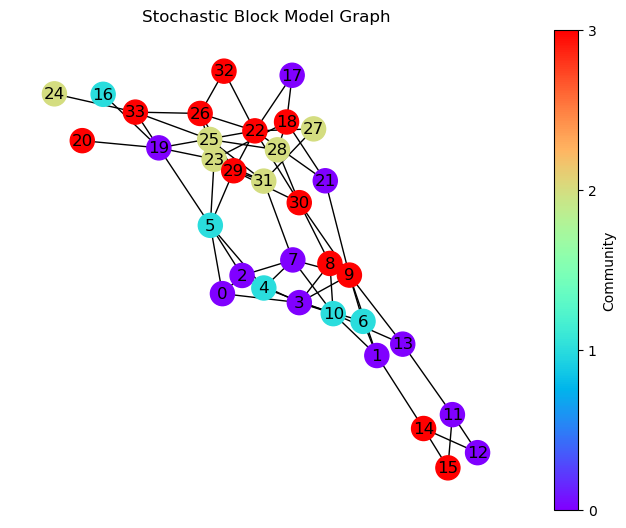

In [208]:
layout = nx.spring_layout(SBM_G)

# Draw the nodes and edges with community colors
node_colors = [block_assignments[node] for node in SBM_G.nodes()]
nx.draw(SBM_G, pos=layout, node_color=node_colors, cmap=plt.cm.rainbow, node_size=300, with_labels=True)

# Add a colorbar to show community colors
sm = plt.cm.ScalarMappable(cmap=plt.cm.rainbow, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])  # You can set this to an empty array because node_colors are already normalized
cbar = plt.colorbar(sm, ticks=range(min(node_colors), max(node_colors) + 1))
cbar.set_label("Community")

# Show the plot
plt.title("Stochastic Block Model Graph")
plt.show()

In [209]:
# dictionary of node-to-block assignments
node_to_block = {node: block_assignments[node] for node in G.nodes()}

# Calculate modularity score for SBM-generated communities
sbm_modularity = community.modularity(node_to_block, G)
sbm_modularity

0.44490358126721763

Comparing to Louvain

In [210]:
louvain_modularity, sbm_modularity

(0.44490358126721763, 0.44490358126721763)

While in this case the score was equal, they might not be necessarily identical since the terms of specific node assignments to communities or in the way they handle overlapping or hierarchical community structures may be different.